In [2]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)  # --> for getting nice backgroud to the graphs
%matplotlib inline 


In [4]:
# Load the Netflix userbase dataset

data = pd.read_csv('/Users/alishapatidar/Desktop/Netflix-User-Behaviour-Analysis-main/DATA/Netflix Userbase.csv')

In [6]:
# Exploratory Data Analysis (EDA)
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [10]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [14]:

# Checking Null Values 
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [16]:
# checking Duplicate Values 
data.duplicated().sum()

0

In [18]:
# Checking Data type of every column
data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [31]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [35]:
# Checking Number of subscriptions of each type
data['Subscription Type'].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [39]:
# Churn Rate Analysis
# Assuming the current date is '2023-07-11'
current_date = pd.to_datetime('2023-07-04')

# Calculate active status
data['active_status'] = (current_date - data['Last Payment Date']).dt.days <= 30
data['active_status'] = data['active_status'].map({True: 'Yes', False: 'No'})

In [41]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Yes
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Yes
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Yes
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Yes
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Yes


<Figure size 1000x800 with 0 Axes>

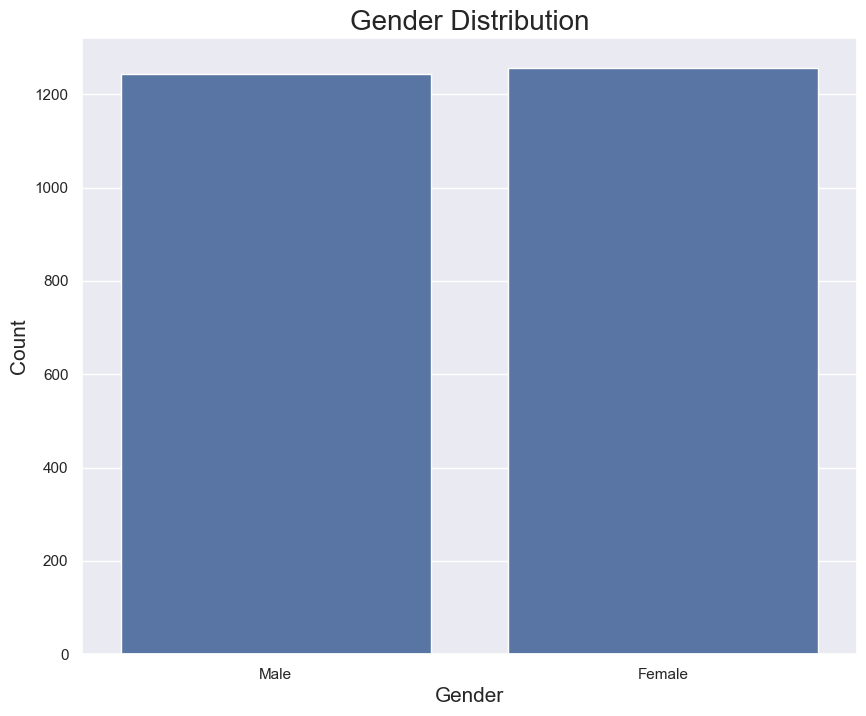

In [45]:
# Data visualization
# 1. Bar plot - Gender distribution

plt.figure(figsize = (10,8))
sns.countplot(x='Gender', data = data)
plt.title('Gender Distribution',fontsize = 20)
plt.xlabel('Gender',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

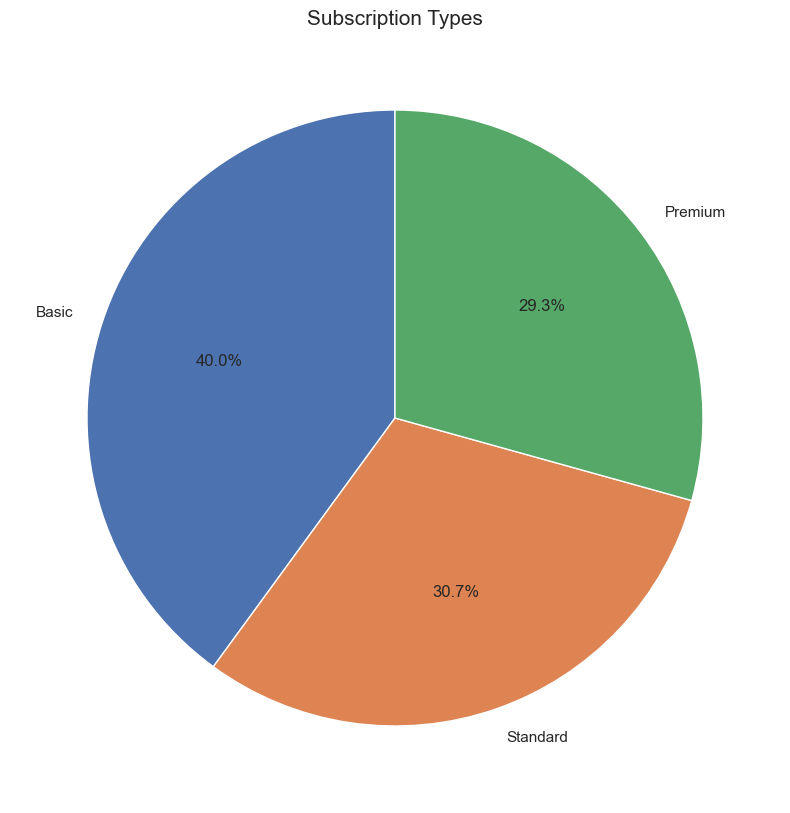

In [47]:
plt.figure(figsize = (10,10))
subscription_counts = data['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Types',fontsize = 15)
plt.show()


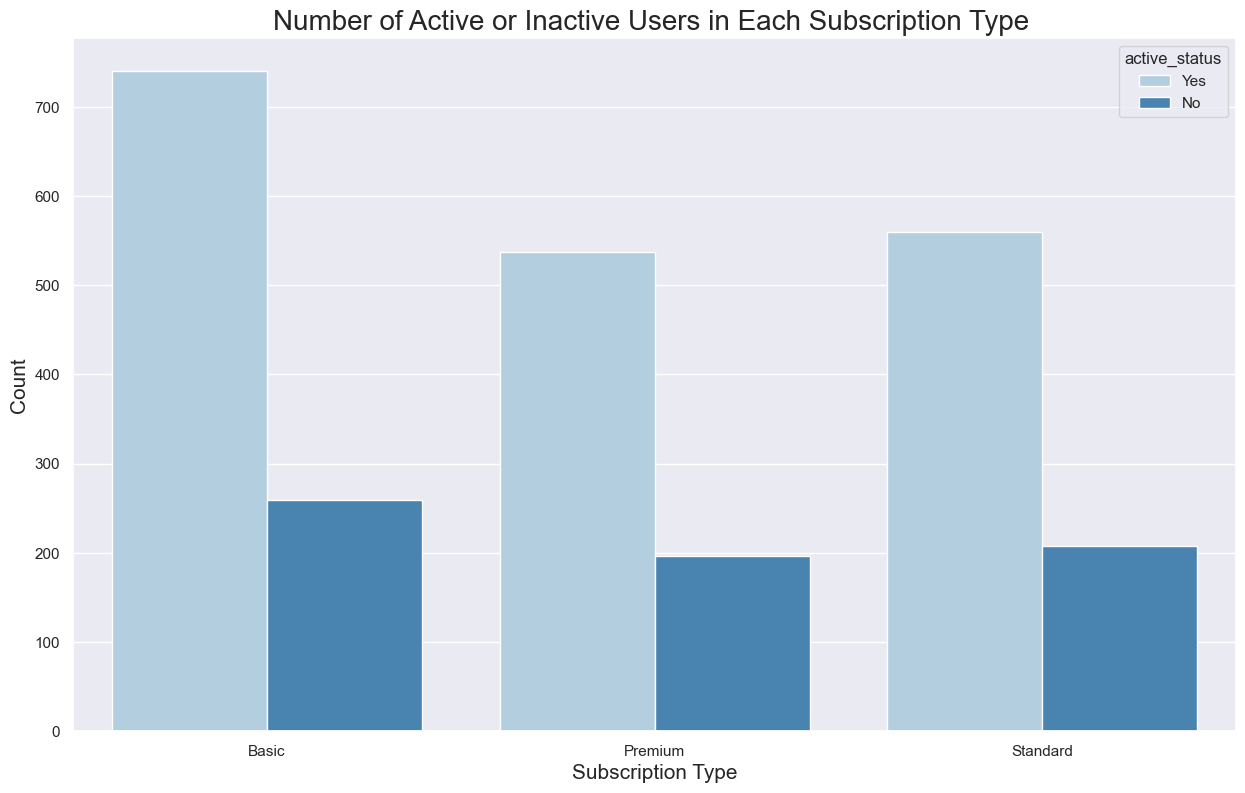

In [49]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = data , hue = 'active_status',palette = 'Blues', alpha=1)
plt.title('Number of Active or Inactive Users in Each Subscription Type ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

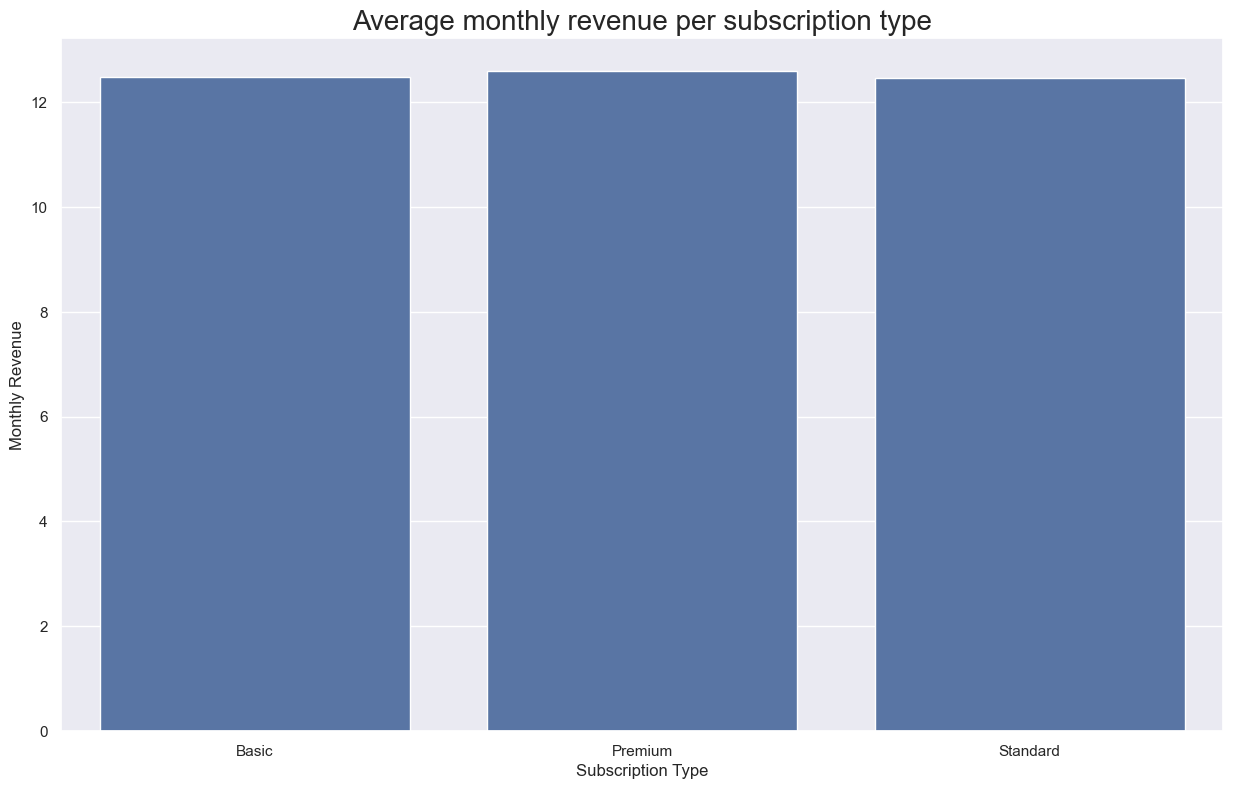

In [51]:
plt.figure(figsize = (15,9))
sns.barplot(x='Subscription Type', y='Monthly Revenue', data=data.groupby('Subscription Type')['Monthly Revenue'].mean().reset_index())
plt.title('Average monthly revenue per subscription type' , fontsize = 20)
plt.show()

In [53]:
data.groupby('Subscription Type')['Monthly Revenue'].mean()

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

In [55]:
a = data[data['active_status']=='No'].groupby('Subscription Type').count()
a

,User ID,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
Subscription Type,,,,,,,,,,
Basic,259,259,259,259,259,259,259,259,259,259
Premium,196,196,196,196,196,196,196,196,196,196
Standard,208,208,208,208,208,208,208,208,208,208


In [57]:
data['active_status'].value_counts()

active_status
Yes    1837
No      663
Name: count, dtype: int64

/var/folders/d6/4jvd305s0zn7jxcgkcvj65q40000gn/T/ipykernel_48763/347457738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Type', data = data[data['active_status']=='No'] ,palette = 'Blues', alpha=1)


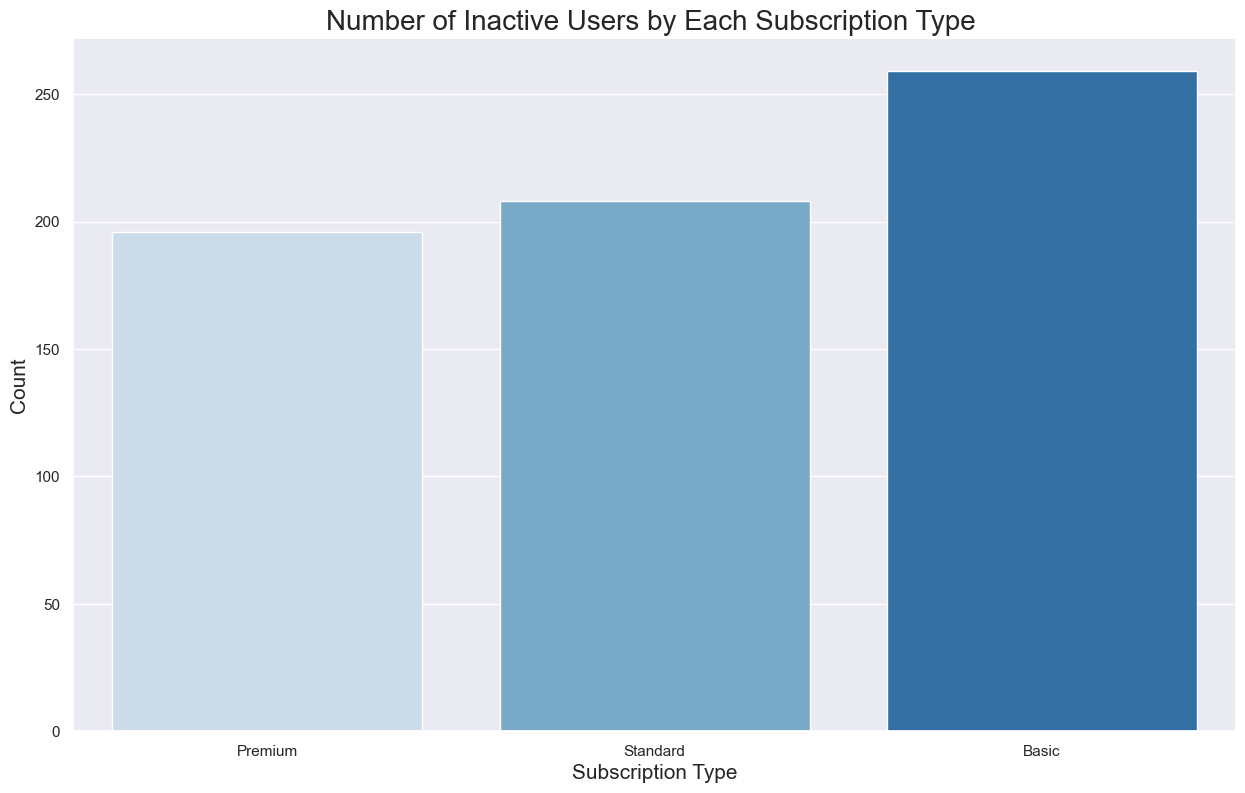

In [59]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = data[data['active_status']=='No'] ,palette = 'Blues', alpha=1)
plt.title('Number of Inactive Users by Each Subscription Type ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [61]:
import random

def get_random_color():
    color = '#%06x' % random.randint(0, 0xFFFFFF)
    return color

colors = []
for i in range(10):
    color = get_random_color()
    colors.append(color)

/var/folders/d6/4jvd305s0zn7jxcgkcvj65q40000gn/T/ipykernel_48763/1566627632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device', data = data, palette = colors, alpha=1)
/var/folders/d6/4jvd305s0zn7jxcgkcvj65q40000gn/T/ipykernel_48763/1566627632.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='Device', data = data, palette = colors, alpha=1)


<Figure size 1500x900 with 0 Axes>

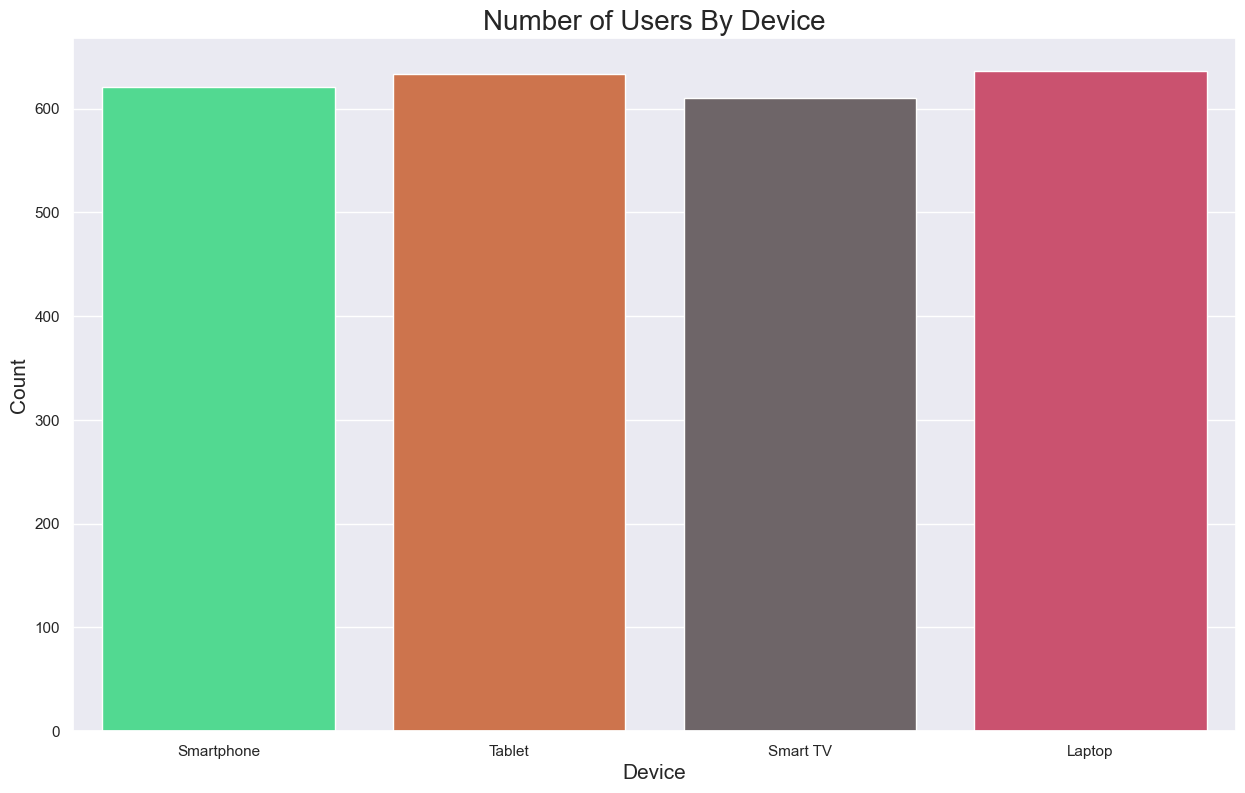

In [65]:
plt.figure(figsize = (15,9))
sns.countplot(x='Device', data = data, palette = colors, alpha=1)
plt.title('Number of Users By Device',fontsize = 20)
plt.xlabel('Device',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

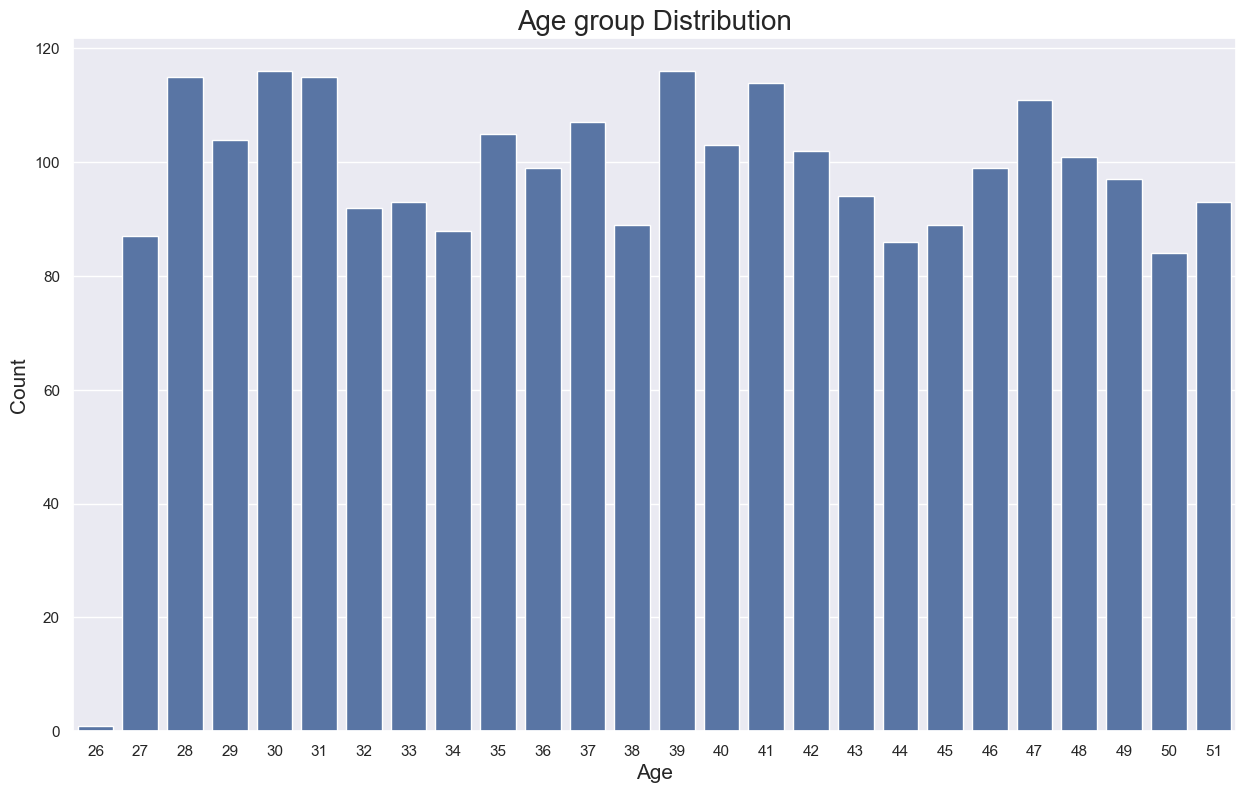

In [67]:
plt.figure(figsize = (15,9))
sns.countplot(x='Age', data = data, alpha=1)
plt.title('Age group Distribution',fontsize = 20)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

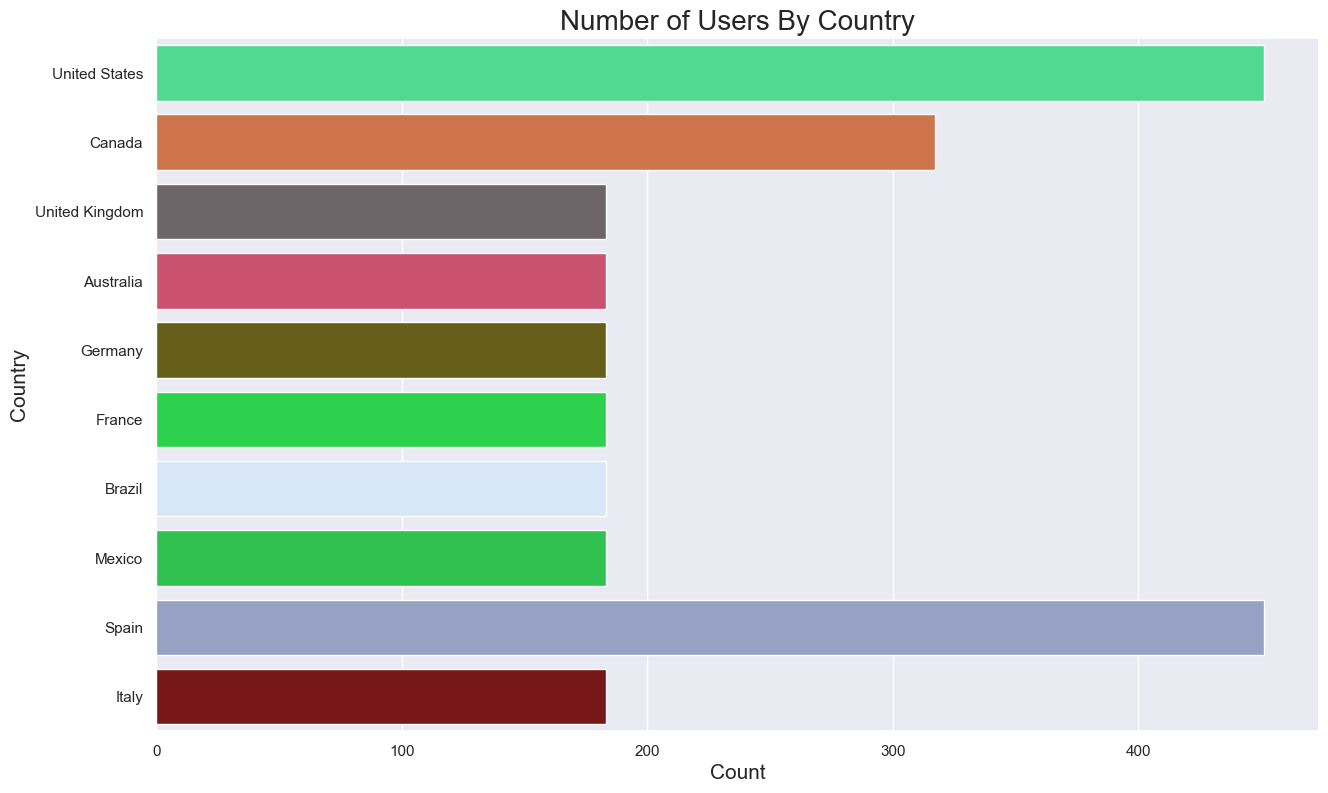

In [81]:
plt.figure(figsize=(15, 9))
sns.countplot(y='Country', hue='Country', data=data, palette=colors, alpha=1, legend=False)
plt.title('Number of Users By Country', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()


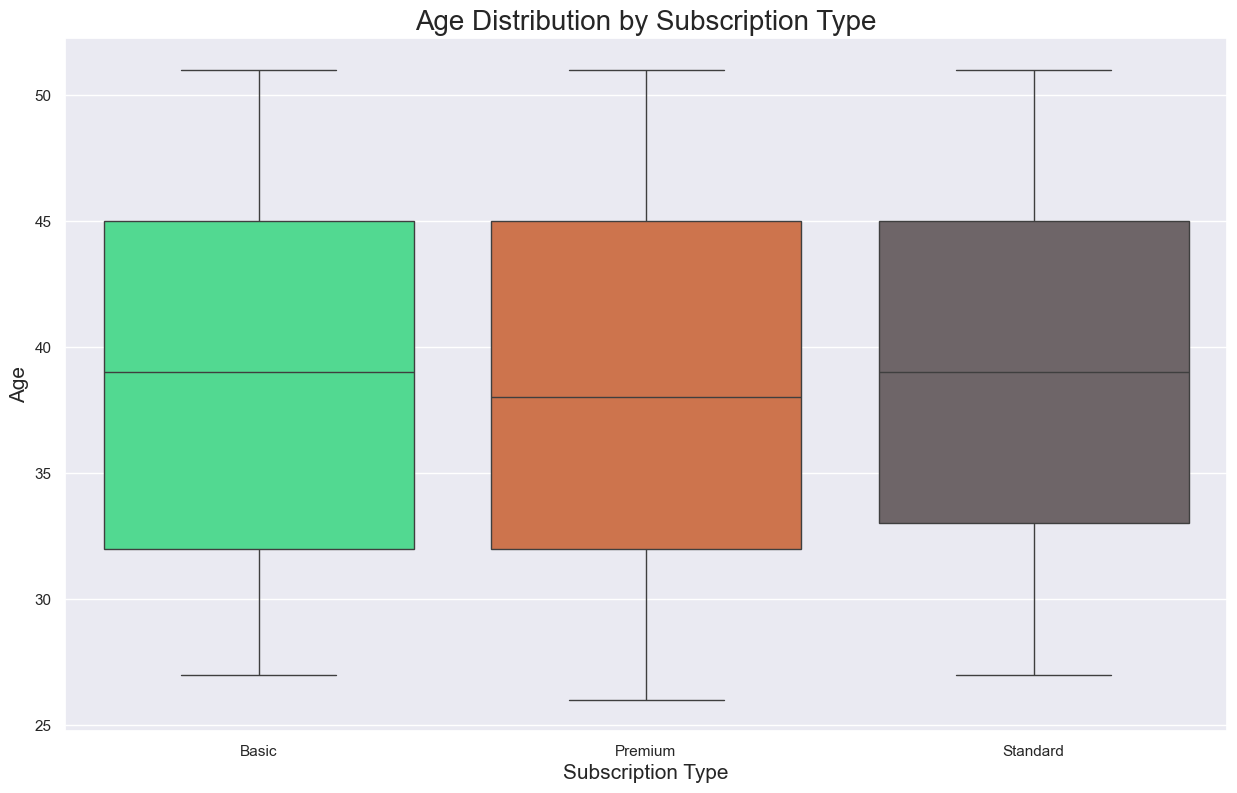

In [101]:


import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 9))
sns.boxplot(x='Subscription Type', y='Age', data=data, palette=colors)
plt.title('Age Distribution by Subscription Type', fontsize=20)
plt.xlabel('Subscription Type', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()
